In [89]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import ipywidgets as widgets
from sklearn import cluster
import datetime
import os

In [2]:
os.chdir('C:\\Users\\arowan\OneDrive - New Mexico State University\\Research\\Machine Learning\\prism weather data')

In [66]:
df = pd.read_csv('weather_data(2015-2020).csv')
dfu = pd.read_csv('weather_data(2015-2020).csv')

In [67]:
df = df.dropna(0)
dfu = dfu.dropna(0)

In [68]:
x = df.values
x = StandardScaler().fit_transform(x)
x

array([[-1.73058775,  0.04733233,  0.85294655, ..., -0.459767  ,
        -0.02118085,  0.99523853],
       [-1.72901291,  0.0926244 ,  0.28272329, ..., -0.68249235,
        -1.40098819, -0.75365872],
       [-1.72743807,  1.39570311,  2.28880193, ...,  2.21860586,
         1.09690927,  1.31080623],
       ...,
       [ 1.72775218, -0.50037886, -0.69015576, ..., -1.98468544,
        -0.39451516,  0.9094189 ],
       [ 1.72932702, -0.05341222, -0.05416075, ...,  0.79600741,
         1.02572461,  0.96728889],
       [ 1.73090185,  0.04591509, -0.89420285, ..., -0.95560161,
        -1.52852415, -0.88923972]])

In [10]:
n = 2
pca_wd = PCA(n_components=n)

pca_weather = pca_wd.fit_transform(x)

In [11]:
print('Explained variation per principal component: {}'.format(pca_wd.explained_variance_ratio_))

Explained variation per principal component: [0.62454354 0.17104358]


In [25]:
n_c = 3
kmeans = cluster.KMeans(n_clusters = 3).fit(pca_weather)
label = kmeans.labels_

In [47]:
label.shape

(2196,)

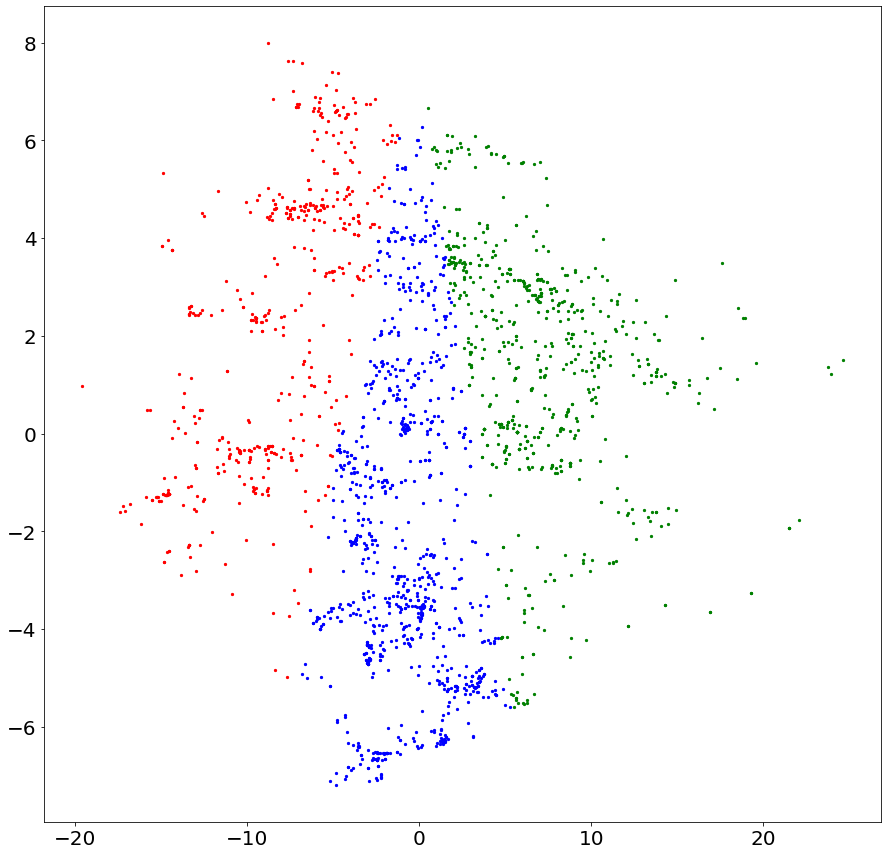

In [136]:
fig = plt.figure(figsize=(15,15))
# ax = plt.axes(projection='3d')plt
plt.scatter(pca_weather[label == 0,0],pca_weather[label == 0,1],s=5,c='red')
plt.scatter(pca_weather[label == 1,0],pca_weather[label == 1,1],s=5,c='green')
plt.scatter(pca_weather[label == 2,0],pca_weather[label == 2,1],s=5,c='blue')
plt.show()

In [94]:
dfu = np.array(dfu)
dfu.shape

(2196, 69)

In [87]:
from matplotlib.dates import (YEARLY, DateFormatter, rrulewrapper, RRuleLocator, drange)

2196


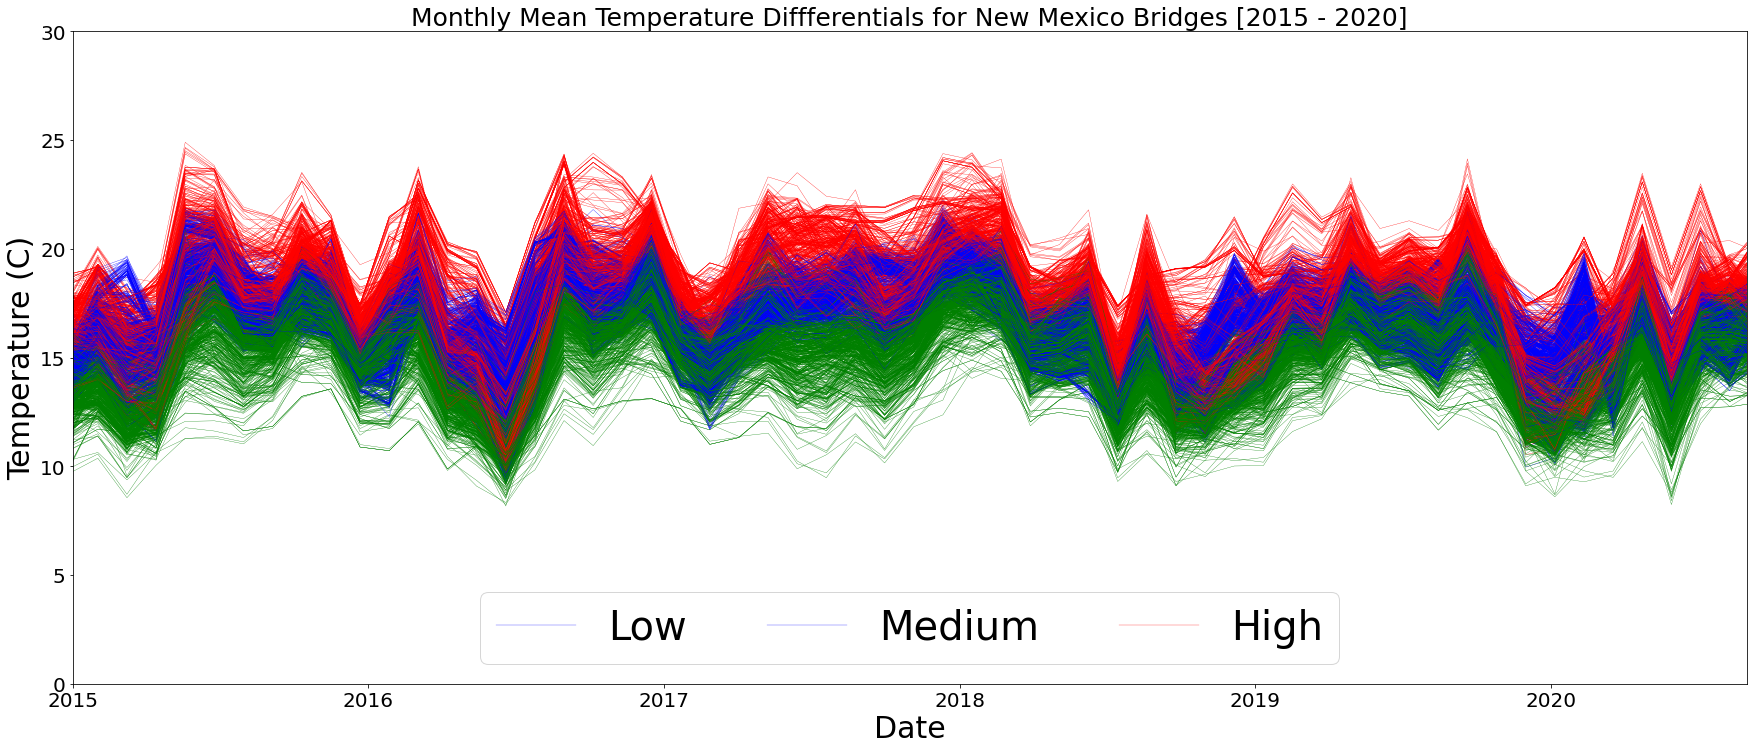

In [135]:
colors = ['red','green','blue']
date1 = datetime.date(2014, 1, 1)
date2 = datetime.date(2020, 9, 30)
delta = datetime.timedelta(days=36)

dates = drange(date1, date2, delta)
fig = plt.figure(figsize=(30,12))
axes = plt.axes()
plt.rcParams.update({'font.size': 20})

cnt = 0
for i in range(0,dfu.shape[0]):
    cnt += 1
    plt.plot(dates,dfu[i,:],lw=.3,c=colors[label[i]])
    axes.set_xlim([datetime.date(2015, 1, 1), datetime.date(2020, 8, 30)])
    axes.set_ylim([0,30])
    
print(cnt)
plt.title('Monthly Mean Temperature Diffferentials for New Mexico Bridges [2015 - 2020]',fontsize=25)
plt.xlabel('Date',fontsize=30)
plt.ylabel('Temperature (C)',fontsize=30)
plt.legend(['Low','Medium','High'],fontsize=40,loc='lower center',ncol=3)
plt.show()
fig.savefig('temp_plot.png')

In [93]:
dates.size

68